In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot')

In [2]:
df = pd.read_csv("Oil Data.csv")
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,14-Oct-22,85.61,89.27,89.73,85.20,0,-3.93%
1,13-Oct-22,89.11,87.08,89.66,85.56,298.03K,2.11%
2,12-Oct-22,87.27,88.67,90.07,86.28,332.27K,-2.33%
3,11-Oct-22,89.35,91.14,91.35,87.91,333.16K,-1.95%
4,10-Oct-22,91.13,93.48,93.64,90.54,289.51K,-1.63%


In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values('Date')
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
209,2022-01-03,76.08,75.69,76.46,74.27,317.63K,1.16%
208,2022-01-04,76.99,76.02,77.64,75.70,372.85K,1.20%
207,2022-01-05,77.85,77.18,78.58,76.51,397.90K,1.12%
206,2022-01-06,79.46,77.24,80.24,76.73,476.67K,2.07%
205,2022-01-07,78.90,79.62,80.47,78.52,414.43K,-0.70%


In [7]:
df["Date"][10]

Timestamp('2022-09-30 00:00:00')

In [ ]:
df.describe()

,Price,Open,High,Low
count,210.000000,210.000000,210.000000,210.000000
mean,97.857476,97.838238,100.162667,95.449524
std,11.520578,11.657990,12.038758,10.985885
min,76.080000,75.690000,76.460000,74.270000
25%,88.457500,88.180000,90.235000,86.637500
50%,96.130000,96.360000,98.910000,94.150000
75%,107.657500,107.392500,109.750000,104.005000
max,123.700000,124.660000,130.500000,120.790000


In [ ]:
df.dropna(axis = 0, inplace=True)
df.shape

(210, 7)

In [ ]:
df.index = df['Date']
df = df.drop(["High", "Open", "Low", "Volume", "Chg%", "Date"], axis = 1)
df.head()

,Price
Date,
2022-01-03,76.08
2022-01-04,76.99
2022-01-05,77.85
2022-01-06,79.46
2022-01-07,78.90


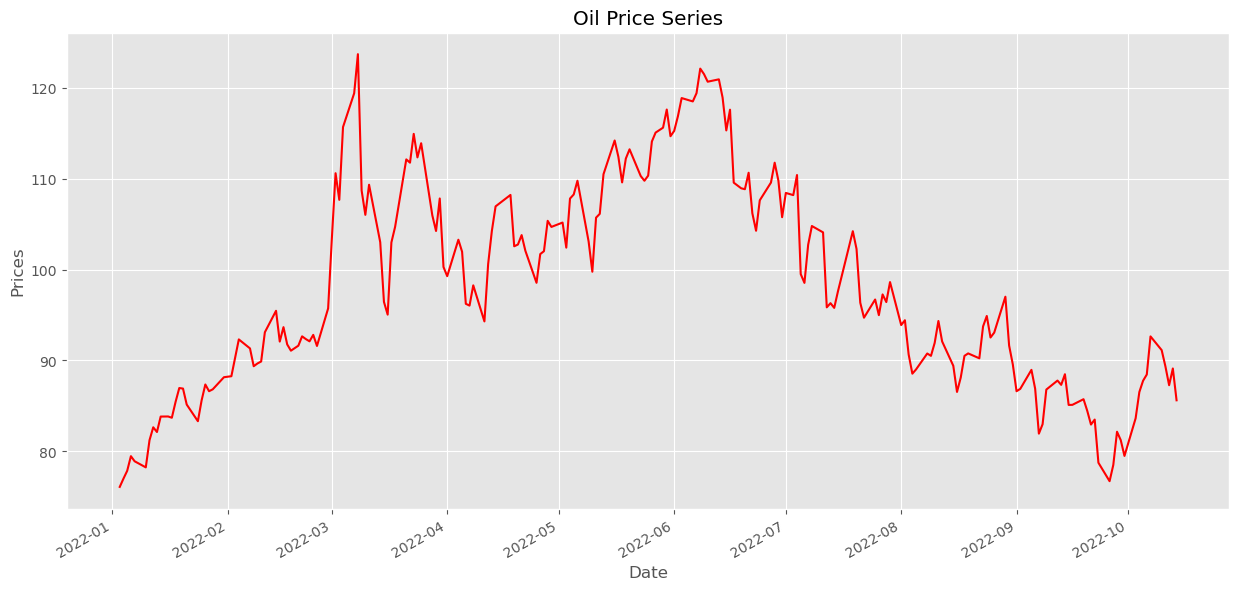

In [ ]:
# Plot the price of Oil
df["Price"].plot(figsize=(15, 7),color='r')
plt.ylabel("Prices")
plt.title("Oil Price Series")
plt.show()

In [ ]:
#Data Preprocesing Using Z-score technique
from scipy.stats import zscore
mdata = df.apply(zscore)
mdata.head()

mean_p = df["Price"].mean()
s_p = df["Price"].std()



In [ ]:
len(df.index) # 0 to 209

210

In [ ]:
#Making matrices of 10*1 shape
mdata=np.array(mdata)
dataset=[]
label=[]
for i in range(len(df.index) - 11): # Over range(199), i.e. 0 to 198
  dataset.append(mdata[i:i+10]) # Till 208, 199 sets
  label.append(mdata[i+11]) # mdata[11 to 209]
label = np.array(label)
dataset = np.array(dataset)

In [ ]:
dataset[0]

array([[-1.89482804],
       [-1.8156502 ],
       [-1.74082279],
       [-1.60073892],
       [-1.64946374],
       [-1.70775951],
       [-1.44760376],
       [-1.32405152],
       [-1.369296  ],
       [-1.22138136]])

In [ ]:
len(label)

199

In [ ]:
#Splitting Data into test, validation, train
train_ratio = 0.6
val_train = 0.8
r=int(len(dataset)*train_ratio)
s=int(len(dataset)*val_train)
X_train=dataset[:r]
X_val=dataset[r:s]
X_test=dataset[s:]
y_train=label[:r]
y_val=label[r:s]
y_test=label[s:]


In [ ]:
# Model
model = keras.models.Sequential()
model.add(layers.Conv1D(32,1,padding='same',activation='tanh',input_shape=(10,1)))
model.add(layers.MaxPool1D(pool_size=1,padding='same'))
model.add(layers.LSTM(64,activation='tanh',))
model.add(layers.Dense(1))

In [ ]:
model.compile(loss='mean_absolute_error',optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 32)            64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 32)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 24,961
Trainable params: 24,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("Training data: " + str(len(y_train)))

Training data: 119


In [ ]:
#Training
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,batch_size=64)

Epoch 1/100


2022-11-01 08:11:28.025548: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 1s 187ms/step - loss: 0.8836 - val_loss: 0.4421
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 0.6878 - val_loss: 0.3967
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 0.5303 - val_loss: 0.3809
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 0.4342 - val_loss: 0.4220
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 0.3980 - val_loss: 0.4576
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 0.4145 - val_loss: 0.4510
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 0.4108 - val_loss: 0.4165
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 0.3910 - val_loss: 0.3742
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 0.3641 - val_loss: 0.3445
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 0.3603 - val_loss: 0.3285
Epoch 11/100
2/2 [============

In [ ]:
train_pred = model.predict(X_train)
train_pred = (train_pred * s_p) + mean_p
y_train = (y_train * s_p) + mean_p

4/4 [==============================] - 0s 1ms/step


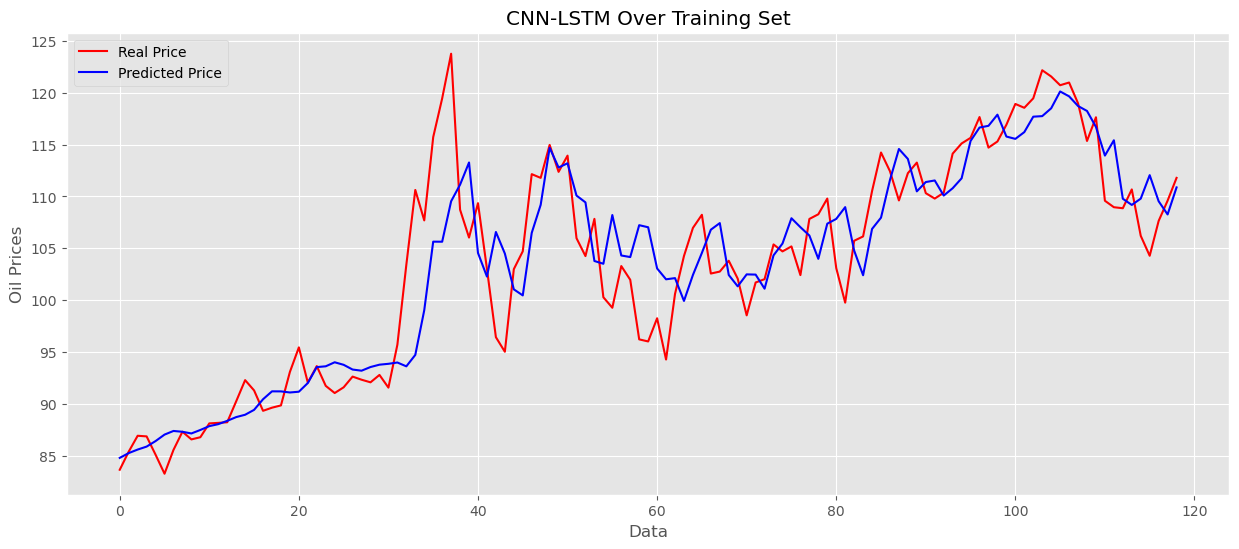

In [ ]:
#Plotting Result
plt.figure(figsize = (15,6))
plt.plot([x for x in range(len(y_train))],y_train,color='red')
plt.plot([x for x in range(len(y_train))],train_pred,color='blue')
plt.xlabel('Data')
plt.ylabel('Oil Prices')
plt.title("CNN-LSTM Over Training Set")
plt.legend(['Real Price','Predicted Price'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred * s_p) + mean_p
y_test = (y_test * s_p) + mean_p

2/2 [==============================] - 0s 2ms/step


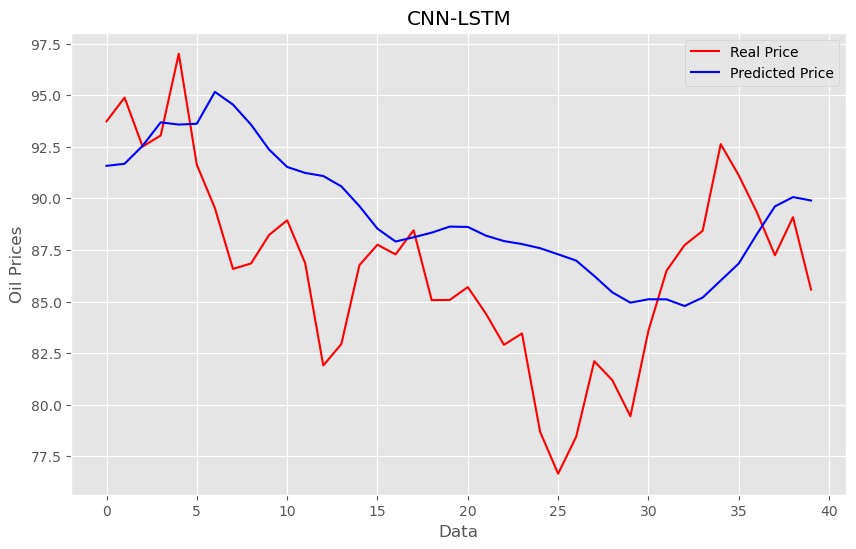

In [ ]:
#Plotting Result
plt.figure(figsize = (10,6))
plt.plot([x for x in range(len(y_test))],y_test,color='red')
plt.plot([x for x in range(len(y_test))],y_pred,color='blue')
plt.xlabel('Data')
plt.ylabel('Oil Prices')
plt.title("CNN-LSTM")
plt.legend(['Real Price','Predicted Price'])
plt.show()

In [ ]:
y_pred.mean()

89.24489

In [ ]:
R=np.sqrt(1 - (np.sum(pow((y_pred - y_pred.mean()),2))/np.sum(pow((y_test - y_test.mean()),2))))

# Accuracy over Test Dataset
R*100

77.08678096706294